### 1.1) Mount google drive to colab

In [ ]:
# mount google drive to colab
from google.colab import drive
import os
n = 140
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone1/

print("###\n### {}".format(os.getcwd()))
print("#" * n)



Mounted at /content/drive
############################################################################################################################################
### colabs default working directory
###
### path: /content
############################################################################################################################################
### setted working directory
/content/drive/Shareddrives/MADS_Milestone1
###
### /content/drive/Shareddrives/MADS_Milestone1
############################################################################################################################################


### 1.2) Import libraries

In [ ]:
import pandas as pd
import numpy as np
import subprocess
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt


### 1.3) Fetch all files from the 'Intermediate_Assets' directory to merge

In [ ]:
# define the ls command to find all results
ls = subprocess.Popen(["ls", "-p", "./Intermediate_Assets"],
                      stdout=subprocess.PIPE,
                     )

# define the grep command to exclude all folders
grep = subprocess.Popen(["grep", "-v", "/$"],
                        stdin=ls.stdout,
                        stdout=subprocess.PIPE,
                        )

# read from the end of the pipe (stdout)
endOfPipe = grep.stdout


csv = {}

path = "Intermediate_Assets/"
# output the files line by line
for line in endOfPipe:  
    
    w = re.sub( "\\\\n'$", "", str(line))
    w = re.sub("^b'", "", w)
    front = re.sub("\d+.", "", w)
    name = re.sub("\..*", "", front)

    if ".csv" in w:
        csv[name] = path + w

#csv.pop("Onco_genes") 
#csv.pop("Baseline")  
csv

{'Baseline': 'Intermediate_Assets/03_Baseline.csv',
 'Onco_genes': 'Intermediate_Assets/04_Onco_genes.csv',
 'degree_centrality_score': 'Intermediate_Assets/02_degree_centrality_score.csv',
 'ground_truth': 'Intermediate_Assets/05_ground_truth.csv',
 'target_association': 'Intermediate_Assets/01_target_association.csv'}

### 1.4) Import all intermediate files

In [ ]:
for k,v in csv.items():
  globals()[k] = pd.read_csv(v)


In [ ]:
n = 80
for k,v in csv.items():  
  print("#"*n)
  print("### directory of '{}' dataset:\n### {}".format(k, os.getcwd() + "/" + v))
  print("#"*n)
  print("### Dimensioality of '{}' dataset:\n### {}".format(k, globals()[k].shape))
  print("#"*n)
  print("### Distribution of '{}' dataset:\n{}".format(k, globals()[k].describe()))
  print("#"*n)
  print("### Dtypes of '{}' dataset:\n### {}".format(k, globals()[k].dtypes))
  print("#"*n)
  print("### Number of missing values of '{}' dataset:\n### {}".format(k, globals()[k].isnull().apply(np.sum)))
  display(globals()[k].head())

################################################################################
### directory of 'target_association' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/01_target_association.csv
################################################################################
### Dimensioality of 'target_association' dataset:
### (27472, 11)
################################################################################
### Distribution of 'target_association' dataset:
       overall_score  ...  druggability_score_antibody
count   27472.000000  ...                 27472.000000
mean        0.139367  ...                     0.158504
std         0.126350  ...                     0.227092
min         0.000611  ...                     0.000000
25%         0.042172  ...                     0.000000
50%         0.107988  ...                     0.000000
75%         0.198423  ...                     0.350000
max         1.000000  ...                     1.000000

[8 

,SYMBOL,overall_score,affected_pathway_score,animal_model_score,genetic_association_score,literature_score,rna_expression_score,somatic_mutation_score,druggability_score_smallmolecule,druggability_score_other_modalities,druggability_score_antibody
0,NF1,0.346749,0.043544,0.055043,0.138956,0.027207,0.000016,0.219218,0.55,0.0,0.000000
1,ABCC6,0.224391,0.070588,0.087401,0.155794,0.016307,0.001947,0.000000,0.50,0.0,0.450000
2,AKT2,0.405630,0.052861,0.078375,0.021072,0.019325,0.000011,0.299032,0.60,0.0,0.525000
3,NSDHL,0.252277,0.000000,0.199878,0.054635,0.003064,0.000286,0.000000,0.50,0.0,0.350000
4,RNASET2,0.187137,0.000000,0.020483,0.161549,0.012771,0.001435,0.000000,0.00,0.0,0.566667


################################################################################
### directory of 'degree_centrality_score' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/02_degree_centrality_score.csv
################################################################################
### Dimensioality of 'degree_centrality_score' dataset:
### (19354, 2)
################################################################################
### Distribution of 'degree_centrality_score' dataset:
       degree_centrality_score
count             19354.000000
mean                  0.031396
std                   0.027328
min                   0.000052
25%                   0.012453
50%                   0.024234
75%                   0.042061
max                   0.395029
################################################################################
### Dtypes of 'degree_centrality_score' dataset:
### SYMBOL                      object
degree_centrality_score    float

,SYMBOL,degree_centrality_score
0,ARF5,0.085878
1,CALM2,0.097143
2,ARHGEF9,0.035912
3,ERN1,0.080659
4,CDKN2A,0.203534


################################################################################
### directory of 'Baseline' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/03_Baseline.csv
################################################################################
### Dimensioality of 'Baseline' dataset:
### (43284, 2)
################################################################################
### Distribution of 'Baseline' dataset:
       tissue_specificity_score
count              43284.000000
mean                   0.436646
std                    0.326453
min                    0.000000
25%                    0.092410
50%                    0.429559
75%                    0.769774
max                    0.924015
################################################################################
### Dtypes of 'Baseline' dataset:
### SYMBOL                       object
tissue_specificity_score    float64
dtype: object
###############################################

,SYMBOL,tissue_specificity_score
0,TSPAN6,0.760734
1,TNMD,0.323986
2,DPM1,0.889377
3,SCYL3,0.873238
4,C1orf112,0.839103


################################################################################
### directory of 'Onco_genes' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/04_Onco_genes.csv
################################################################################
### Dimensioality of 'Onco_genes' dataset:
### (7477, 2)
################################################################################
### Distribution of 'Onco_genes' dataset:
       onco_driven_score
count             7477.0
mean                 1.0
std                  0.0
min                  1.0
25%                  1.0
50%                  1.0
75%                  1.0
max                  1.0
################################################################################
### Dtypes of 'Onco_genes' dataset:
### SYMBOL               object
onco_driven_score     int64
dtype: object
################################################################################
### Number of missing values of 'Onc

,SYMBOL,onco_driven_score
0,NOL10,1
1,CELSR1,1
2,RHOH,1
3,DGKD,1
4,ITPRIP,1


################################################################################
### directory of 'ground_truth' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/05_ground_truth.csv
################################################################################
### Dimensioality of 'ground_truth' dataset:
### (3473, 2)
################################################################################
### Distribution of 'ground_truth' dataset:
       SYMBOL         TARGTYPE
count    3473             3473
unique   2854                5
top      BACT  Research target
freq       91             1778
################################################################################
### Dtypes of 'ground_truth' dataset:
### SYMBOL      object
TARGTYPE    object
dtype: object
################################################################################
### Number of missing values of 'ground_truth' dataset:
### SYMBOL      0
TARGTYPE    0
dtype: int64


,SYMBOL,TARGTYPE
0,SPP1,Research target
1,TGFA,Clinical Trial target
2,FUNG,Research target
3,CCN2,Clinical Trial target
4,MRCKA,Research target


In [ ]:
CSV = sorted(csv.items(), key=lambda x: x[1])
n = 80
JOIN = "SYMBOL"
for k,v in CSV:
  if "01" in v:  
    df = globals()[k]
    df.drop(columns="overall_score", inplace=True) # redudant therefore need to drop
    df.drop(columns="literature_score", inplace=True) # could be used to validate results therefore might be dorped
    df.drop(columns=["druggability_score_antibody","druggability_score_other_modalities", "druggability_score_smallmolecule"],inplace=True) # because its leaking informations about our ground truth labels
    
    
    print("#"*n)
    print("### '{}' dataset was assigned to 'df' as first merging dataset\n### Dimensionality: {}".format(k, df.shape))

  else:
    if "05" in v:
            
      df2 = df.copy().shape
      df = df.merge(globals()[k] , how="left", on=JOIN)

      print("#"*n)
      print("### '{}' dataset was merged to df using 'LEFT JOIN on '{}'\n### New dimensionality of dataset {}".format(k, JOIN, df.shape))
      print("### number of genes that are not matched in the dataset {} corresponding to {} matched gene targets".format(df.shape[0]-df2[0], globals()[k].shape[0] - (df.shape[0]-df2[0])))
    elif "04" in v:
      
      
      df = df.merge(globals()[k] , how="left", on=JOIN)
      df.loc[:,globals()[k].columns[-1]].fillna(0, inplace=True)
      catched = df.loc[:,globals()[k].columns[-1]].value_counts()
         
      print("#"*n)
      print("### '{}' dataset was merged to df using 'LEFT JOIN on '{}'\n### New dimensionality of dataset {}".format(k, JOIN, df.shape))
      print("### number of genes that are not matched in the dataset {} corresponding to {} matched gene targets".format(len(globals()[k])-catched[1], catched[1]))
    
    else:
      
      df2 = df.merge(globals()[k] , how="outer", on=JOIN)
      df = df.merge(globals()[k] , how="inner", on=JOIN)
      print("#"*n)
      print("### '{}' dataset was merged to df using 'inner JOIN' on '{}'\n### New dimensionality of dataset {}".format(k, JOIN, df.shape))
      print("### genes that were filtered out {} due to 'INNER JOIN'".format(df2.shape[0]-df.shape[0]))
  display(df.head())

df.set_index(JOIN, inplace=True)
    
    

   

################################################################################
### 'target_association' dataset was assigned to 'df' as first merging dataset
### Dimensionality: (27472, 6)


,SYMBOL,affected_pathway_score,animal_model_score,genetic_association_score,rna_expression_score,somatic_mutation_score
0,NF1,0.043544,0.055043,0.138956,0.000016,0.219218
1,ABCC6,0.070588,0.087401,0.155794,0.001947,0.000000
2,AKT2,0.052861,0.078375,0.021072,0.000011,0.299032
3,NSDHL,0.000000,0.199878,0.054635,0.000286,0.000000
4,RNASET2,0.000000,0.020483,0.161549,0.001435,0.000000


################################################################################
### 'degree_centrality_score' dataset was merged to df using 'inner JOIN' on 'SYMBOL'
### New dimensionality of dataset (18307, 7)
### genes that were filtered out 10257 due to 'INNER JOIN'


,SYMBOL,affected_pathway_score,animal_model_score,genetic_association_score,rna_expression_score,somatic_mutation_score,degree_centrality_score
0,NF1,0.043544,0.055043,0.138956,0.000016,0.219218,0.121738
1,ABCC6,0.070588,0.087401,0.155794,0.001947,0.000000,0.035085
2,AKT2,0.052861,0.078375,0.021072,0.000011,0.299032,0.110422
3,NSDHL,0.000000,0.199878,0.054635,0.000286,0.000000,0.034672
4,RNASET2,0.000000,0.020483,0.161549,0.001435,0.000000,0.026456


################################################################################
### 'Baseline' dataset was merged to df using 'inner JOIN' on 'SYMBOL'
### New dimensionality of dataset (17944, 8)
### genes that were filtered out 25762 due to 'INNER JOIN'


,SYMBOL,affected_pathway_score,animal_model_score,genetic_association_score,rna_expression_score,somatic_mutation_score,degree_centrality_score,tissue_specificity_score
0,NF1,0.043544,0.055043,0.138956,0.000016,0.219218,0.121738,0.901425
1,ABCC6,0.070588,0.087401,0.155794,0.001947,0.000000,0.035085,0.724430
2,AKT2,0.052861,0.078375,0.021072,0.000011,0.299032,0.110422,0.890774
3,NSDHL,0.000000,0.199878,0.054635,0.000286,0.000000,0.034672,0.859227
4,RNASET2,0.000000,0.020483,0.161549,0.001435,0.000000,0.026456,0.853718


################################################################################
### 'Onco_genes' dataset was merged to df using 'LEFT JOIN on 'SYMBOL'
### New dimensionality of dataset (17944, 9)
### number of genes that are not matched in the dataset 433 corresponding to 7044 matched gene targets


,SYMBOL,affected_pathway_score,animal_model_score,genetic_association_score,rna_expression_score,somatic_mutation_score,degree_centrality_score,tissue_specificity_score,onco_driven_score
0,NF1,0.043544,0.055043,0.138956,0.000016,0.219218,0.121738,0.901425,1.0
1,ABCC6,0.070588,0.087401,0.155794,0.001947,0.000000,0.035085,0.724430,0.0
2,AKT2,0.052861,0.078375,0.021072,0.000011,0.299032,0.110422,0.890774,0.0
3,NSDHL,0.000000,0.199878,0.054635,0.000286,0.000000,0.034672,0.859227,1.0
4,RNASET2,0.000000,0.020483,0.161549,0.001435,0.000000,0.026456,0.853718,1.0


################################################################################
### 'ground_truth' dataset was merged to df using 'LEFT JOIN on 'SYMBOL'
### New dimensionality of dataset (18253, 10)
### number of genes that are not matched in the dataset 309 corresponding to 3164 matched gene targets


,SYMBOL,affected_pathway_score,animal_model_score,genetic_association_score,rna_expression_score,somatic_mutation_score,degree_centrality_score,tissue_specificity_score,onco_driven_score,TARGTYPE
0,NF1,0.043544,0.055043,0.138956,0.000016,0.219218,0.121738,0.901425,1.0,NaN
1,ABCC6,0.070588,0.087401,0.155794,0.001947,0.000000,0.035085,0.724430,0.0,NaN
2,AKT2,0.052861,0.078375,0.021072,0.000011,0.299032,0.110422,0.890774,0.0,Research target
3,NSDHL,0.000000,0.199878,0.054635,0.000286,0.000000,0.034672,0.859227,1.0,NaN
4,RNASET2,0.000000,0.020483,0.161549,0.001435,0.000000,0.026456,0.853718,1.0,NaN


define the ground truth labels for this combined datasets based on the 'TARGETSTATUS' column were:


  - target = ['Clinical Trial target', 'Successful target', 'Patented target']
  - no_target = ['Discontinued target', np.nan]
  - unknown_target = ['Research target']


(18253, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 18253 entries, NF1 to ANKHD1-EIF4EBP3
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   affected_pathway_score     18253 non-null  float64
 1   animal_model_score         18253 non-null  float64
 2   genetic_association_score  18253 non-null  float64
 3   rna_expression_score       18253 non-null  float64
 4   somatic_mutation_score     18253 non-null  float64
 5   degree_centrality_score    18253 non-null  float64
 6   tissue_specificity_score   18253 non-null  float64
 7   onco_driven_score          18253 non-null  float64
 8   TARGETSTATUS               18253 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


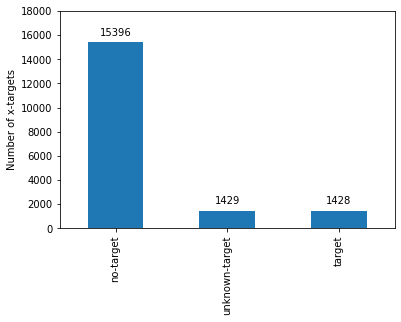

In [ ]:
 
print(df.shape)

target = ['Clinical Trial target', 'Successful target', 'Patented target']
no_target = ['Discontinued target', np.nan]
unknown_target = ['Research target']

df["TARGETSTATUS"] = 0
df.loc[df.TARGTYPE.isin(target), "TARGETSTATUS"] = "target"
df.loc[df.TARGTYPE.isin(no_target), "TARGETSTATUS"] = "no-target"
df.loc[df.TARGTYPE.isin(unknown_target), "TARGETSTATUS"] = "unknown-target"

df.drop(columns="TARGTYPE", inplace=True)

ax = df.TARGETSTATUS.value_counts().plot.bar(ylim=[0,18000], ylabel="Number of x-targets")

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=0), (p.get_x()+p.get_width()/2., 
  p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

df.info()

# 1.5)Relation between the features and TARGETSTATUS variable

Exploring the relationship between individual features (converted to 2 categories of 'less than mean' and 'Mean and more') with the TARGETSTATUS variable.

['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score', 'somatic_mutation_score', 'degree_centrality_score', 'tissue_specificity_score', 'onco_driven_score']
['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score', 'somatic_mutation_score', 'degree_centrality_score', 'tissue_specificity_score', 'onco_driven_score', 'TARGETSTATUS', 'affected_pathway_score_2', 'animal_model_score_2', 'genetic_association_score_2', 'rna_expression_score_2', 'somatic_mutation_score_2', 'degree_centrality_score_2', 'tissue_specificity_score_2', 'onco_driven_score_2']
['affected_pathway_score_2', 'animal_model_score_2', 'genetic_association_score_2', 'rna_expression_score_2', 'somatic_mutation_score_2', 'degree_centrality_score_2', 'tissue_specificity_score_2', 'onco_driven_score_2']


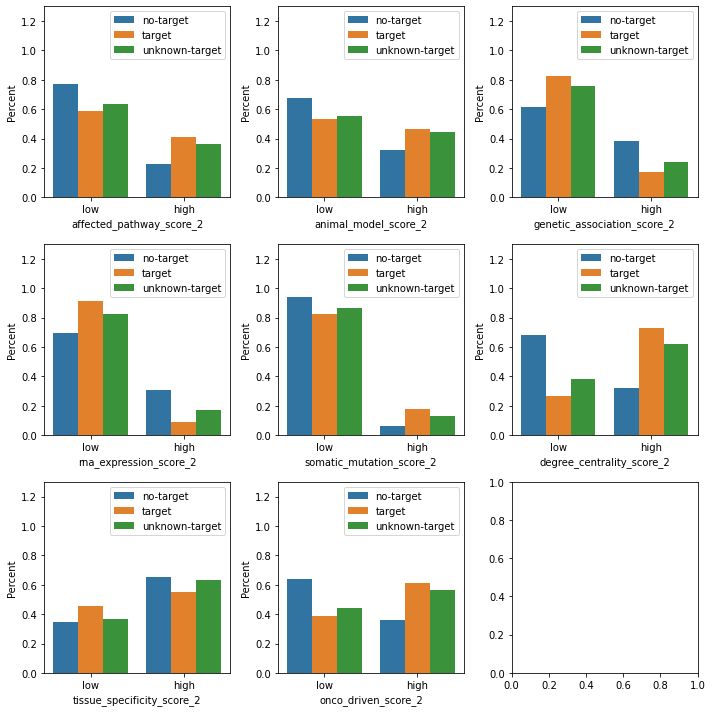

In [ ]:
df2=df.copy()

# Converting each feature column into 2 categories of '>=Median', '<Median' 
features_list=list(df.columns)[:-1]
print(features_list)

for col in features_list:
  bins = [-1,df2[col].mean(),df2[col].max()]
  labels=['low','high']
  df2[col+'_2'] = pd.cut(df2[col], bins,labels=labels)


print(list(df2.columns))

# Plotting the features  against the TARGETSTATUS variable
col_list2=list(df2.columns)[9:]
print(col_list2)

# df3=df2[col_list2]

# ax = sns.countplot(x="affected_pathway_score_2", hue="TARGETSTATUS", data=df3)



# Setting up the fig and axes of the subplots
fig,((ax1,ax2,ax3),
      (ax4,ax5,ax6),
      (ax7,ax8,ax9),
      )=plt.subplots(3,3,figsize=(10,10))


# List of axis items
axis_hist=[ax1,ax2,ax3,
            ax4,ax5,ax6,
             ax7,ax8,ax9,
             ]


for idx,val in enumerate(col_list2):
      name=str(val)

      df3 = (df2.groupby([val,'TARGETSTATUS']).size() / df.groupby(['TARGETSTATUS']).size()).reset_index().rename({0:'percent'}, axis=1)
      chart=sns.barplot(x=val, hue='TARGETSTATUS', y='percent', data=df3,ax=axis_hist[idx])

      
      chart.legend(loc='best', prop={'size': 10})
      chart.set(ylabel="Percent")
      chart.set(ylim=(0,1.3))

      
#Show Plot
fig.tight_layout()
plt.show()


Bar plot Output:

We find distinct patterns amongst the various features and the ground truth labels (TARGETSTATUS).